### Objective: Make an exploratory data analysis of the provided dataset: how many classes, how many examples per class, word distribution (e.g. TF-IDF), etc. You should document your analysis with proper visualizations.


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_json('./data/data.jsonl', lines=True)


data.head()


,text,label
0,i feel awful about it too because it s my job ...,0
1,im alone i feel awful,0
2,ive probably mentioned this before but i reall...,1
3,i was feeling a little low few days back,0
4,i beleive that i am much more sensitive to oth...,2
...,...,...
416804,that was what i felt when i was finally accept...,1
416805,i take every day as it comes i m just focussin...,4
416806,i just suddenly feel that everything was fake,0
416807,im feeling more eager than ever to claw back w...,1


## Data Cleaning

In [19]:
print(data.isnull().sum()) #! no missing values were found


print("Number of duplicate rows:", data.duplicated().sum())
data.drop_duplicates(inplace=True)

text     0
label    0
dtype: int64
Number of duplicate rows: 686


## Re-labeling

In [23]:
emotions_to_int = {
    'sadness': 0,
    'joy': 1,
    'love': 2,
    'anger': 3,
    'fear': 4,
    'surprise': 5
}

int_to_emotions = {v: k for k, v in emotions_to_int.items()}

emotions_count =  data['label'].explode().value_counts()
# replace the int values with the emotions

emotions_count.index = emotions_count.index.map(int_to_emotions)
emotions_count



label
joy         141067
sadness     121187
anger        57317
fear         47712
love         34554
surprise     14972
Name: count, dtype: int64

## Amount of entries per class

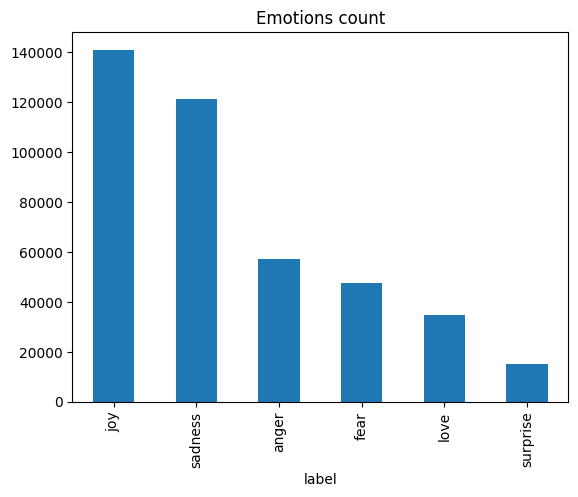

In [11]:
# plot the emotions count
emotions_count.plot(kind='bar', title='Emotions count')
plt.show()

## Word distribution

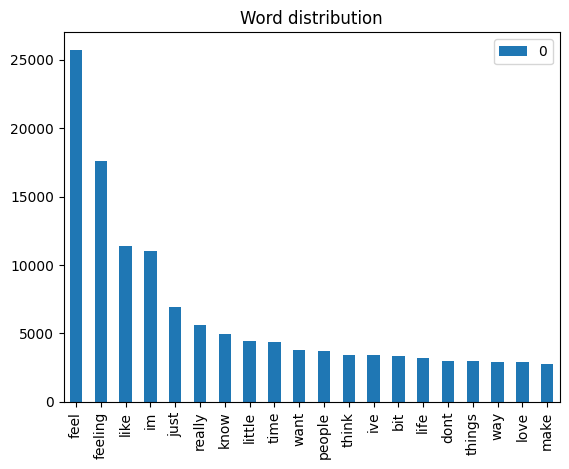

In [14]:
# plot the word distribution
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['text'])

words = vectorizer.get_feature_names_out()
word_distribution = X.sum(axis=0)
word_distribution = pd.DataFrame(word_distribution, columns=words)
word_distribution = word_distribution.T
word_distribution = word_distribution.sort_values(by=0, ascending=False)
word_distribution = word_distribution.head(20)
word_distribution.plot(kind='bar', title='Word distribution')
plt.show()

## Word Cloud per emotion

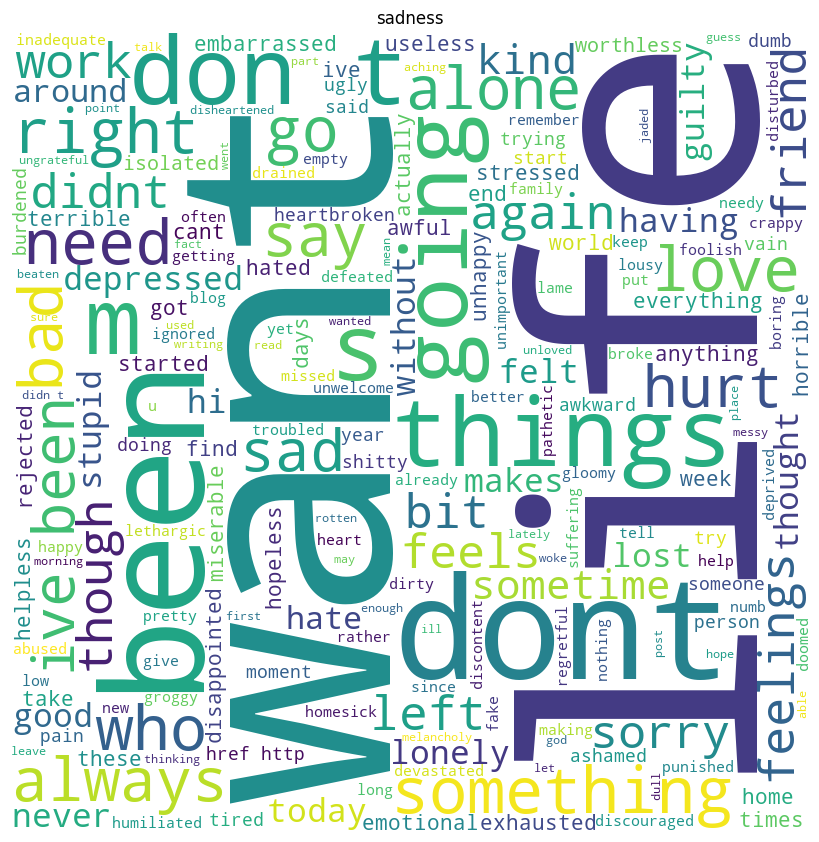

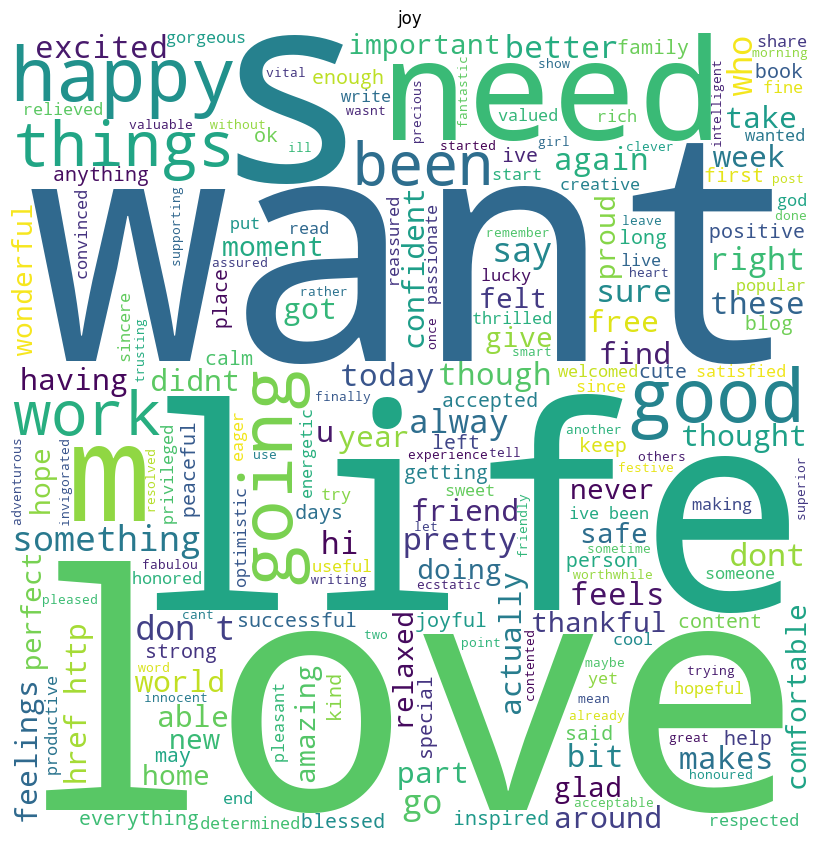

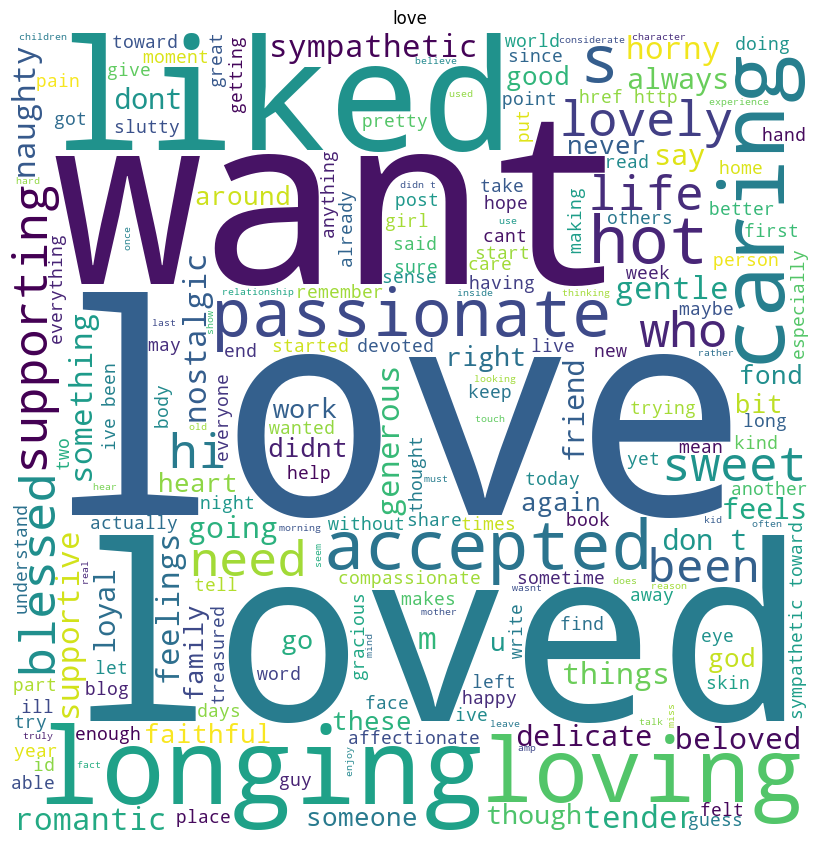

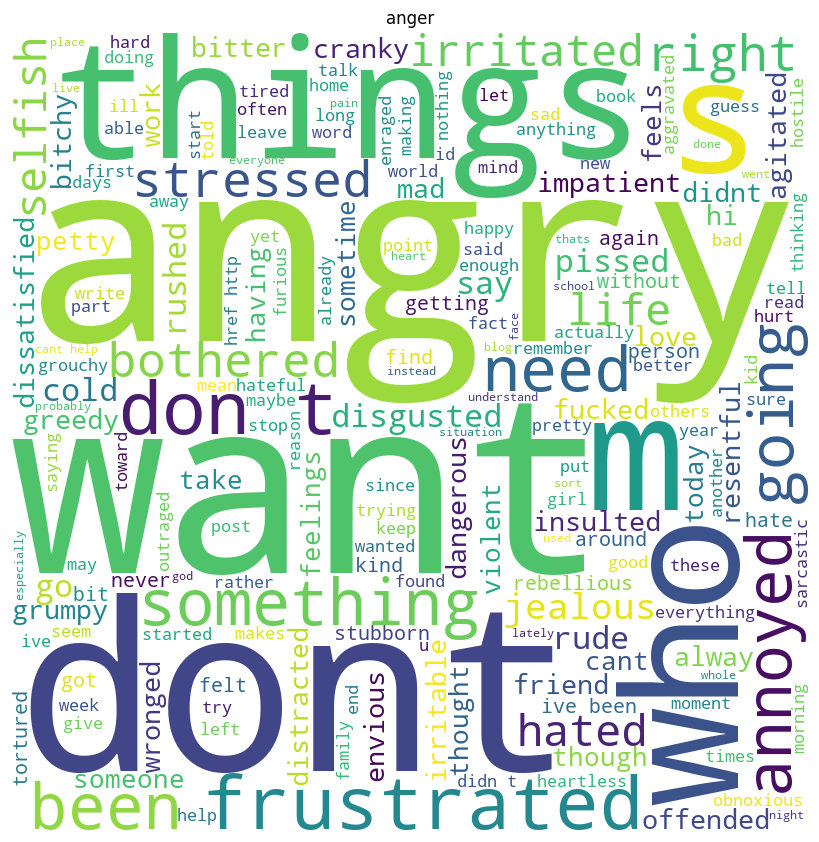

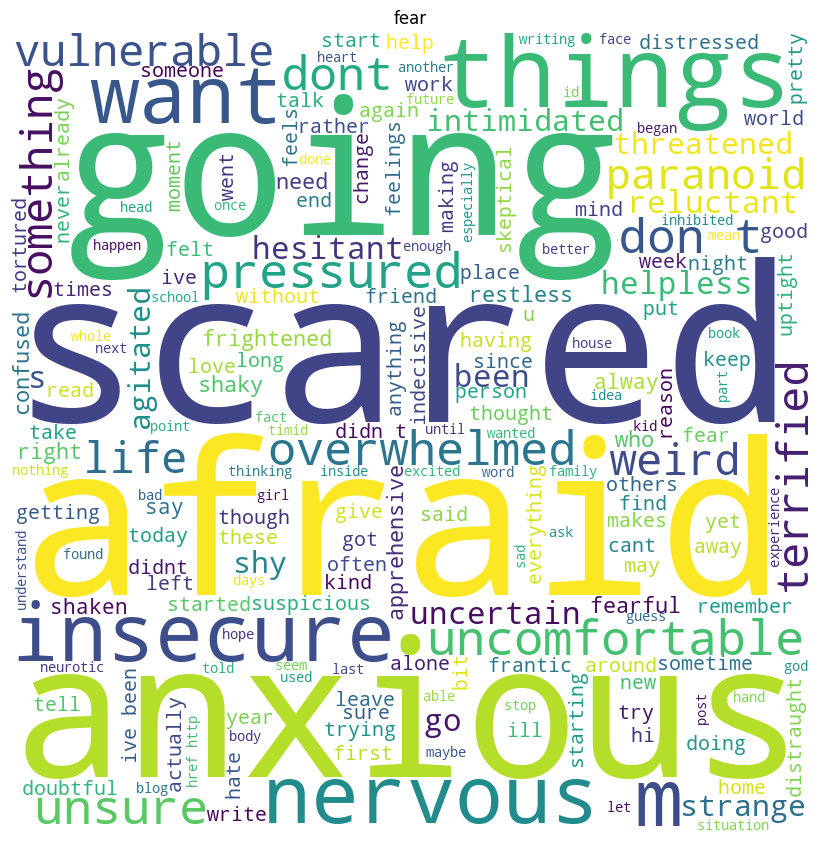

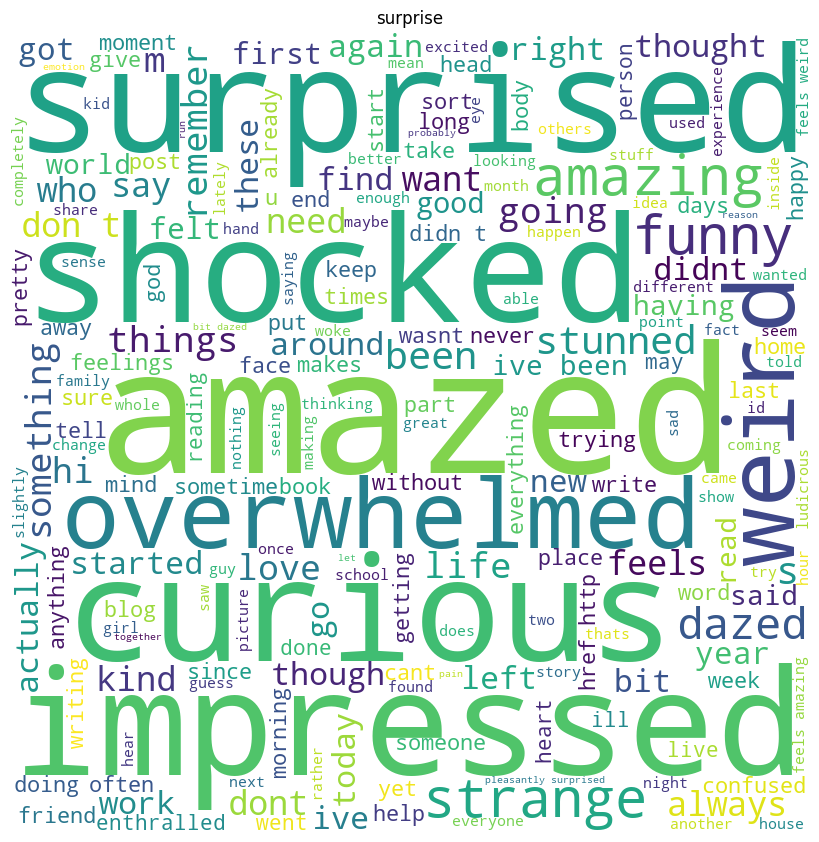

In [15]:

from wordcloud import WordCloud

def generate_wordclouds(data, int_to_emotions):

    for emotion_int, emotion_name in int_to_emotions.items():
        emotion_texts = data[data['label'] == emotion_int]['text']

        wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                stopwords = {'people', 'thing', 'think', 'had', 'day', 'i', 'a', 'im', 'myself', 'he', 'she', 'to', 'of', 'and', 'the', 'in', 'is', 'for', 'it', 'on', 'that', 'with', 'are', 'you', 'be', 'this', 'as', 'at', 'or', 'not', 'have', 'was', 'from', 'by', 'but', 'an', 'they', 'will', 'has', 'my', 'about', 'so', 'all', 'just', 'what', 'like', 'your', 'me', 'more', 'up', 'out', 'if', 'no', 'one', 'get', 'how', 'can', 'we', 'do', 'time', 'when', 'its', 'there', 'would', 'which', 'their', 'some', 'were', 'other', 'then', 'them', 'know', 'only', 'could', 'see', 'him', 'her', 'than', 'now', 'look', 'come', 'did', 'back', 'after', 'our', 'well', 'also', 'even', 'should', 'into', 'over', 'where', 'down', 'most', 'made', 'those', 'because', 'off', 'am', 'too', 'here', 'ever', 'being', 'way', 'make', 'much', 'many', 'still', 'before', 'same', 'might', 'such', 'under', 'every', 'own', 'why', 'between', 'both', 'under', 'against', 'each', 'few', 'through', 'while', 'own', 'same', 'where', 'after', 'before', 'about', 'over', 'under', 'above', 'below', 'more', 'less', 'few', 'many', 'much', 'some', 'any', 'no', 'yes', 'not', 'only', 'so', 'very', 'too', 'just', 'quite', 'really', 'almost', 'nearly', 'well', 'much', 'little', 'more', 'less', 'few', 'lot', 'fewer', 'most', 'least', 'feel', 'feeling'}
                ).generate(' '.join(emotion_texts))
        plt.figure(figsize = (8, 8), facecolor = None)
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.tight_layout(pad = 0)
        plt.title(emotion_name)

        plt.show()

generate_wordclouds(data, int_to_emotions)